In [8]:
from lego_bot.Set import *
import lego_bot.db
import pandas as pd

In [9]:
set_id = 40539

In [10]:
new_set = Set(set_id)

More than one set ID found in title: Zestawy LEGO 40539, 76900, 76911, 75320, 40367
More than one set ID found in title: zestaw 40547 Obi-Wan Kenobi, Darth Vader 40539 Ahsoka Tano Star Wars
More than one set ID found in title: Lego Star Wars BrickHeadz 40539 Ahsoka Rabus 40615
More than one set ID found in title: Lego GwP 40591 + Ahsoka 40539 + moneta + 30654


In [11]:
df = new_set.get_scraped_data()
df.head()

,url,set_id,date_added,date_sold,title,description,price,is_negotiable,is_active
CID88-IDUmzxU,https://www.olx.pl/d/oferta/lego-brickheadz-40...,40539.0,2023-06-08,None,lego brickheadz 40539 Ahsoka Tan,"Czesc, posiadam na sprzedaz nowe, fabrycznie z...",49.99,False,True
CID88-IDULesW,https://www.olx.pl/d/oferta/lego-star-wars-405...,NaN,None,None,None,None,NaN,None,False
CID88-IDUZary,https://www.olx.pl/d/oferta/lego-40539-brickhe...,40539.0,2023-06-13,None,LEGO 40539 - BrickHeadz - Ahsoka Tano NOWY Wro...,"Witam, sprzedam nowy, fabrycznie zaplombowany,...",54.90,False,True
CID88-IDPwk43,https://www.olx.pl/d/oferta/lego-40539-ashoka-...,40539.0,2023-06-01,None,LEGO 40539 Ashoka Tano Brickheadz Nowy,Klocki LEGO BrickHeadz 40539 - Ahsoka Tano Uho...,80.00,False,True
CID88-IDPKioB,https://www.olx.pl/d/oferta/lego-brickheadz-40...,NaN,None,None,None,None,NaN,None,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, CID88-IDUmzxU to CID88-IDUHVHa
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            61 non-null     object 
 1   set_id         39 non-null     float64
 2   date_added     39 non-null     object 
 3   date_sold      0 non-null      object 
 4   title          39 non-null     object 
 5   description    39 non-null     object 
 6   price          39 non-null     float64
 7   is_negotiable  39 non-null     object 
 8   is_active      61 non-null     bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 4.3+ KB


In [14]:
new_set.update_db()

Offers for set 40539 updated


In [15]:
db_df = pd.DataFrame(db.get_offers(set_id), columns=['offer_id', 'url', 'set_id', 'date_added', 'date_sold', 'title', 'description', 'price', 'is_negotiable', 'is_active'])

In [16]:
filtr = db_df['date_sold'].notnull()

sold_offers = db_df[filtr]
db_df

,offer_id,url,set_id,date_added,date_sold,title,description,price,is_negotiable,is_active
0,CID88-IDUtueX,https://www.olx.pl/d/oferta/lego-star-wars-405...,40539,2023-05-13,None,LEGO® star wars 40539 BrickHeadz - Ahsoka Tano,Do sprzedania zestaw LEGO® 40539 BrickHeadz - ...,45.00,1,0
1,CID88-IDUtwSU,https://www.olx.pl/d/oferta/lego-brickheadz-ah...,40539,2023-05-09,2023-05-27,LEGO BrickHeadz - Ahsoka Tano 40539,Do sprzedania mam NOWY zestaw Lego BrickHeadz ...,45.00,0,0
2,CID88-IDUxXnq,https://www.olx.pl/d/oferta/lego-star-wars-405...,40539,2023-05-14,2023-05-31,LEGO star wars 40539 Ashoka Tano BrickHeadz,Przedmiotem aukcji jest zestaw LEGO star wars ...,50.00,0,0
3,CID88-IDUpVng,https://www.olx.pl/d/oferta/lego-star-wars-405...,40539,2023-05-05,2023-05-27,Lego Star Wars 40539 Ashoka,Na sprzedaz zestaw lego star wars 40539 brick ...,40.00,0,0
4,CID88-IDUpj2g,https://www.olx.pl/d/oferta/lego-40539-ahsoka-...,40539,2023-05-05,2023-05-16,Lego 40539 - Ahsoka Tano,Sprzedam: Lego 40539 - Ahsoka Tano Zestaw nowy...,50.00,0,0
...,...,...,...,...,...,...,...,...,...,...
59,CID88-IDUZary,https://www.olx.pl/d/oferta/lego-40539-brickhe...,40539,2023-06-13,None,LEGO 40539 - BrickHeadz - Ahsoka Tano NOWY Wro...,"Witam, sprzedam nowy, fabrycznie zaplombowany,...",54.90,0,1
60,CID88-IDPGlrI,https://www.olx.pl/d/oferta/lego-40539-brickhe...,40539,2023-06-23,None,LEGO 40539 BrickHeadz Ahsoka Tano Star Wars No...,"Witam, sprzedam nowy zestaw LEGO 40539 BrickHe...",45.00,0,1
61,CID88-IDTPvIl,https://www.olx.pl/d/oferta/lego-40539-brickhe...,40539,2023-06-25,None,LEGO 40539 BrickHeadz Star Wars Ashoka Tano,LEGO 40539 BrickHeadz Star Wars Ashoka Tano Ze...,44.99,0,1
62,CID88-IDW0yzh,https://www.olx.pl/d/oferta/klocki-lego-star-w...,40539,2023-06-15,None,Klocki Lego Star Wars 40539 Ahsoka Tano Brick ...,Witam...Nowe Oryginalne Klocki LEGO Brick Head...,44.99,0,1


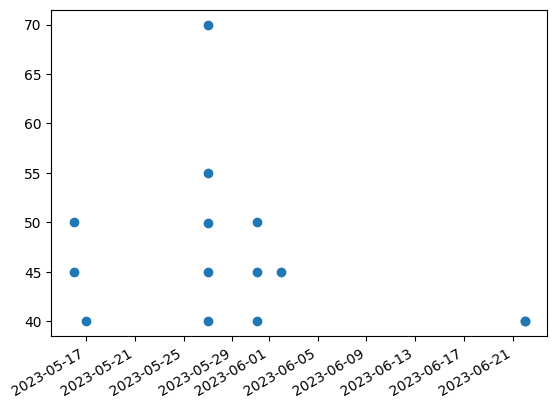

In [18]:
import matplotlib.pyplot as plt

plt.scatter(pd.to_datetime(sold_offers['date_sold']), sold_offers['price'])
plt.gcf().autofmt_xdate()
plt.show()